<a href="https://colab.research.google.com/github/Vaishnavi-cyber-blip/stock-price/blob/master/StockPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

In [ ]:
key = 'Your Key'
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.to_csv('AAPL.csv')
df = pd.read_csv('AAPL.csv')
df1 = df.reset_index()['adjClose']

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[9.80778972e-04]
 [4.41979992e-03]
 [1.48541792e-03]
 ...
 [9.95277662e-01]
 [9.98719366e-01]
 [9.80950567e-01]]


In [ ]:
training_size=int(len(df1)*0.67)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 286ms/step - loss: 0.0079 - val_loss: 0.1422
Epoch 2/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0020 - val_loss: 0.0454
Epoch 3/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0010 - val_loss: 0.0318
Epoch 4/100
12/12 [==============================] - 2s 188ms/step - loss: 3.7592e-04 - val_loss: 0.0024
Epoch 5/100
12/12 [==============================] - 2s 187ms/step - loss: 2.8945e-04 - val_loss: 0.0026
Epoch 6/100
12/12 [==============================] - 2s 187ms/step - loss: 2.7764e-04 - val_loss: 0.0038
Epoch 7/100
12/12 [==============================] - 2s 188ms/step - loss: 2.6046e-04 - val_loss: 0.0027
Epoch 8/100
12/12 [==============================] - 2s 185ms/step - loss: 2.4668e-04 - val_loss: 0.0028
Epoch 9/100
12/12 [==============================] - 2s 187ms/step - loss: 2.3278e-04 - val_loss: 0.0029
Epoch 10/100
12/12 [==============================] - 2s 185ms/step

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

43.69506227497433

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

107.13154705315813

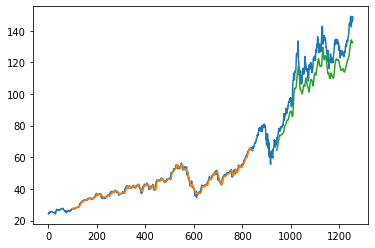

In [ ]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()